# Visualizing The Gender Gap In College Degree

[The department of Education Statistics](https://nces.ed.gov/programs/digest/2013menu_tables.asp)releases a data set annually containing the percentage of bachelor's degrees granted to women from 1970 to 2012. The data set is broken up into 17 categories of degrees, with each column as a separate category.

Randal Olson, a data scientist at University of Pennsylvania, has cleaned the data set and made it available on his personal website. You can [download](http://www.randalolson.com/wp-content/uploads/percent-bachelors-degrees-women-usa.csv) the dataset Randal compiled here.

## Goal Of The Project
 In this project we will generate line charts for visualizing 
 - the gender gap  in STEM fields, which stands for science, technology, engineering, and mathematics.
 -  compare the gender gap cross all degree categories

## Explore the data

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

women_degrees = pd.read_csv('percent-bachelors-degrees-women-usa.csv')
women_degrees.head()

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


## 1.Visualize gender gap in STEM field

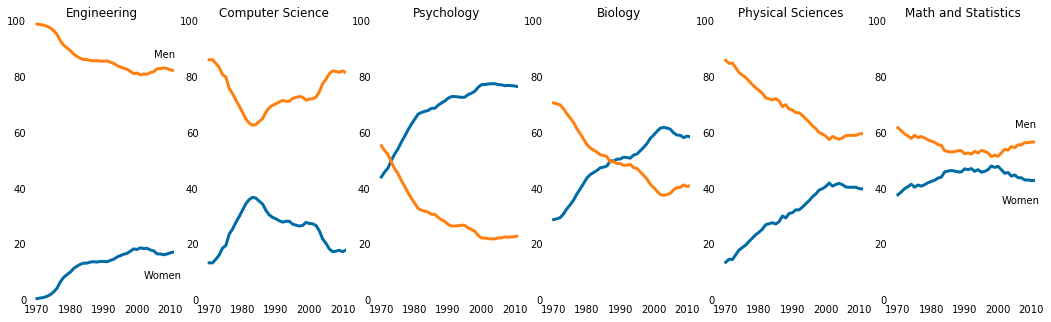

In [2]:

cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)
stem_cats = ['Engineering', 'Computer Science', 'Psychology', 'Biology', 'Physical Sciences', 'Math and Statistics']

fig = plt.figure(figsize=(18,5))

for sp in range(0,6):
    ax = fig.add_subplot(1,6,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[sp]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[sp]], c=cb_orange, label='Men', linewidth=3)
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    ax.set_title(stem_cats[sp])
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    
    if sp == 0:
        ax.text(2005, 87, 'Men')
        ax.text(2002, 8, 'Women')
    elif sp == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2001, 35, 'Women')
plt.show()

Exploring the STEM degrees,there is a big gender gap for Computer science and Engineering degrees and male dominant.Men graduates in psychology steadily decreased from 1975 through 2010 and remained below 50 % where as the women graduates increased steadily for the same year.For Physical sciences degree,there was a big gender gap until 2010 and it became almost equal after that.For Biology and Math & Statistics there is no much gender gap.Also for biology, women graduates increased steadily from 1982 and remained above 50 %.

## 2.Visualize gender gap across all degree categories.
        Because there are seventeen degrees that we need to generate line charts for, we'll use a subplot grid layout of 6 rows by 3 columns. We can then group the degrees into STEM, liberal arts, and other

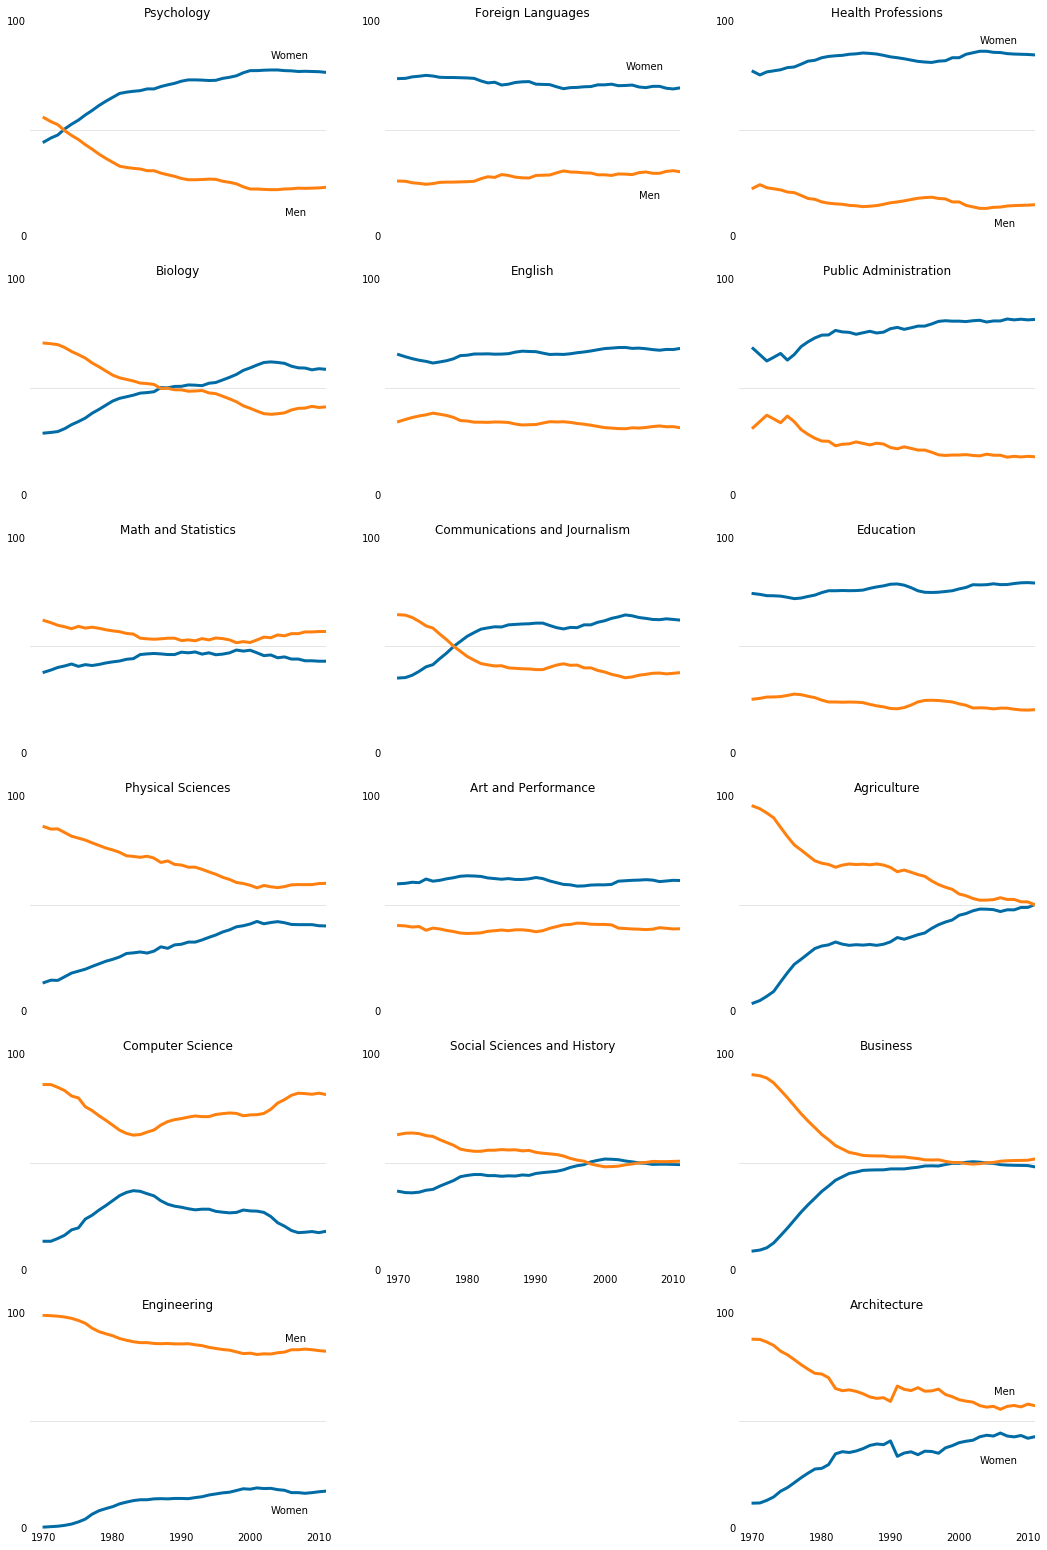

In [3]:
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering']

lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']

other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

fig=plt.figure(figsize=(18,27))

cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)

# for plotting stem degrees in first column

for sp in range(0,18,3):
    stem_index = int(sp/3)
    ax=fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[stem_cats[stem_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[stem_index]], c=cb_orange, label='Men', linewidth=3)
    
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.tick_params(bottom="off", top="off", left="off", right="off",labelbottom='off')   
    
    
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    
    #Enable just the y-axis labels at 0 and 100.
    
    ax.set_yticks([0,100])
    
    # generate a horizontal line starting at y axis 
    #to understand which degrees have close to 50-50 gender breakdown
    #set third color (light gray) in the Color Blind 10 palette
    # transparency of 0.3
    
    ax.axhline(50,c=(171/255,171/255,171/255),alpha =0.3)
    
    ax.set_title(stem_cats[stem_index])
    if stem_index == 0:
        ax.text(2003, 83, 'Women')
        ax.text(2005, 10, 'Men')
    elif stem_index == 5:
        ax.text(2005, 87, 'Men')
        ax.text(2003, 7, 'Women')
        ax.tick_params(labelbottom='on')
#plt.show()

#for plotting lib_arts_cat in second column

for sp in range(1,16,3):
    lib_index = int(sp/3)
    ax=fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[lib_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[lib_index]], c=cb_orange, label='Men', linewidth=3)
    
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    #labelbottom='off' to disble the x axis labels for all of line charts     
    ax.tick_params(bottom="off", top="off", left="off", right="off",labelbottom='off')   
    
    
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    
    ax.set_yticks([0,100])
    
    ax.axhline(50,c=(171/255,171/255,171/255),alpha =0.3)
    
    ax.set_title(lib_arts_cats[lib_index])
    if lib_index == 0:
        ax.text(2003, 78, 'Women')
        ax.text(2005, 18, 'Men')
    if lib_index == 4:
        
        #enable the x-axis labels for the bottommost line charts in each column:
        ax.tick_params(labelbottom='on')
    

# for plotting other cats in the third column

for sp in range(2,20,3):
    other_index = int((sp-2)/3)
    ax=fig.add_subplot(6,3,sp+1)
    ax.plot(women_degrees['Year'], women_degrees[other_cats[other_index]], c=cb_dark_blue, label='Women', linewidth=3)
    ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[other_index]], c=cb_orange, label='Men', linewidth=3)
    
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.tick_params(bottom="off", top="off", left="off", right="off",labelbottom='off')   
    
    
    ax.set_xlim(1968, 2011)
    ax.set_ylim(0,100)
    
    ax.set_yticks([0,100])
    
    ax.axhline(50,c=(171/255,171/255,171/255),alpha =0.3)
    
    ax.set_title(other_cats[other_index])
    if other_index == 0:
        ax.text(2003, 90, 'Women')
        ax.text(2005, 5, 'Men')
    elif other_index == 5:
        ax.text(2005, 62, 'Men')
        ax.text(2003, 30, 'Women')
        ax.tick_params(labelbottom='on')

#export the fig containing all of the line charts to "gender_degrees.png"        
plt.savefig('gender-degrees.png')       
plt.show()



In liberal arts category , for degrees  such as Foreign languages,English, Art&performances the women graduates remained above 50 % from 1970 -2010.For communications and journalism degree women percentage increased from  year 1980 and remained above 50%.For social science women graduates were below 50 % until 1999 and the proportion started to become more balanced from 2000.

In other category, for degrees such as Health Profession,Public Administration and Education ,women graduates were more than 50% and remained the same.
On the other hand,for agriculture and Business field the women graduates were below 50 % but gradually became balanced from 2000. For Architecture,the gap was big during 1970.This field was male dominant.But  number of women graduates seems to increase steadily.

## Conclusion

- There is a huge gender gap in Engineering and computer science degrees which is male dominant.It seems like we need more women Engineers.
- Considering the liberal arts category,most degrees have more women graduates than men,but there is no huge gap.
- In other category such as Health Profession,Public Administration and Education ,majority were the women graduates.
  In agriculture,Business,Architecture fields there were more men graduates,but the number of women students increased gradually and became more balanced.